#### (week 4) Fundamentals of Quantitative Modeling  by University of Pennsylvania
#### Muhammad Kevin Alrahmanto (19/445592/PA/19416, Universitas Gadjah Mada)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 1.  Simple Linear regression model for the diamonds data

### 1.1  Generating simulated diamonds data

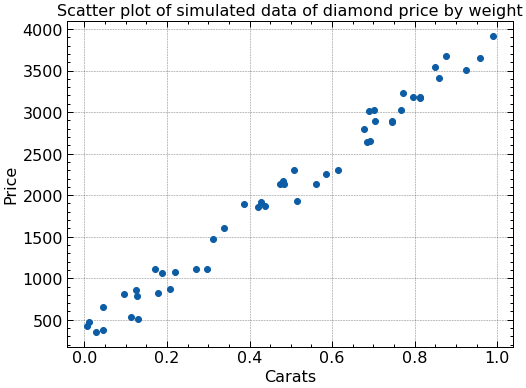

In [2]:
ran_gen=np.random.RandomState(22)
weight=ran_gen.rand(50)
price=3721*weight + 480*ran_gen.rand(50)
plt.scatter(weight, price)
plt.xlabel('Carats')
plt.ylabel('Price')
plt.title('Scatter plot of simulated data of diamond price by weight')
plt.show()

In [3]:
diamonds=pd.DataFrame({'Weight':weight,
                      'Price':price })
diamonds=diamonds.sort_values(by=['Weight']).reset_index(drop=True)
diamonds.tail(5)

,Weight,Price
45,0.859182,3409.896262
46,0.874928,3681.125351
47,0.923270,3511.258233
48,0.957832,3649.311276
49,0.988886,3921.355979


### 1.2  simple linear regression model

$$
y=\beta_0+\beta_1x_1\\
$$

In [4]:
import statsmodels.api as sm

In [5]:
x = diamonds['Weight']
y = diamonds['Price']
x = sm.add_constant(x)

model = sm.OLS(y, x).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     2744.
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           5.11e-44
Time:                        19:45:17   Log-Likelihood:                -317.90
No. Observations:                  50   AIC:                             639.8
Df Residuals:                      48   BIC:                             643.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        303.9110     38.524      7.889      0.000     226.453     381.369
Weight      3604.3582     68.802     52.388      0.000    3466.023    3742.694
==============================================================================
Omnibus:                        8.259   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                2.750
Skew:                          -0.163   Prob(JB):                        0.253
Kurtosis:                       1.898   Cond. No.                         4.25
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
price_hat=model.params.Weight*diamonds['Weight'] + model.params.const

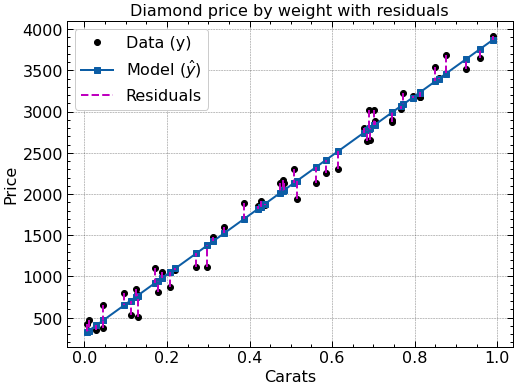

In [7]:
plt.plot(diamonds['Weight'],diamonds['Price'],'ko',markerfacecolor='k')
plt.plot(diamonds['Weight'],price_hat,'s-')

for i in range(diamonds.shape[0]):
    plt.plot([diamonds['Weight'][i],diamonds['Weight'][i]],[diamonds['Price'][i], price_hat[i]],'m--') 
    

plt.legend(('Data (y)','Model ($\^{y}$)','Residuals'))

plt.xlabel('Carats')
plt.ylabel('Price')
plt.title('Diamond price by weight with residuals')
plt.show()  

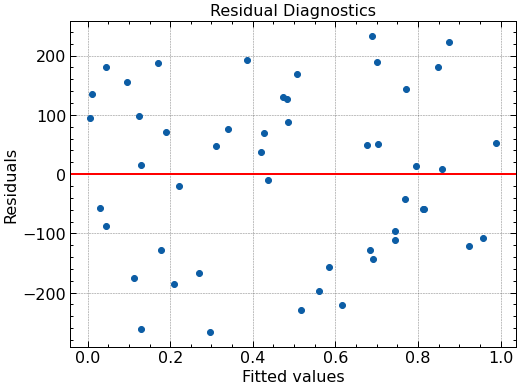

In [8]:
plt.scatter(diamonds['Weight'], diamonds['Price'] - price_hat)
plt.axhline(0, color='red')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Diagnostics')
plt.show()

# 2.  Log-log model for sales by price

### 2.1  Generating simulated data

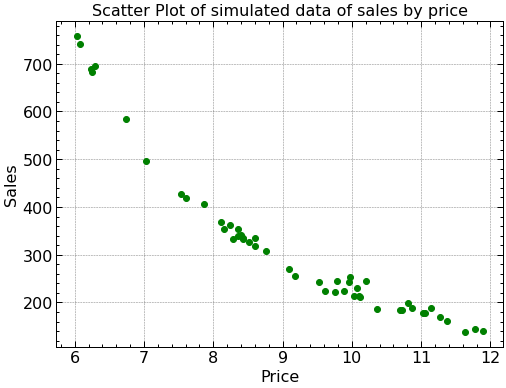

In [9]:
np.random.RandomState(22)
price=np.random.uniform(6, 12, 50)
sales=np.round(np.exp(11.015 -2.442*np.log(price)) + 11*np.random.randn(50), 0)
plt.scatter(price, sales,color='green')
plt.xlabel('Price')
plt.ylabel('Sales')
plt.title('Scatter Plot of simulated data of sales by price')
plt.show()

In [10]:
log_model=pd.DataFrame({'Price':price,
                      'Sales':sales })
log_model=log_model.sort_values(by=['Price']).reset_index(drop=True)
log_model.head(5)

,Price,Sales
0,6.028995,759.0
1,6.069727,741.0
2,6.237114,690.0
3,6.248825,682.0
4,6.285027,695.0


### 2.2  Log-log model

$$
ln⁡(y)=β_0+β_1  ln⁡(x_1 )   
$$

In [11]:
log_model["Log_Price"]=np.log(log_model['Price'])
log_model["Log_Sales"]=np.log(log_model['Sales'])
log_model.head(5)

,Price,Sales,Log_Price,Log_Sales
0,6.028995,759.0,1.796580,6.632002
1,6.069727,741.0,1.803314,6.608001
2,6.237114,690.0,1.830518,6.536692
3,6.248825,682.0,1.832393,6.525030
4,6.285027,695.0,1.838170,6.543912


In [12]:
x = log_model["Log_Price"]
y = log_model["Log_Sales"]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Log_Sales   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     3879.
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           1.43e-47
Time:                        19:45:36   Log-Likelihood:                 79.233
No. Observations:                  50   AIC:                            -154.5
Df Residuals:                      48   BIC:                            -150.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.9384      0.085    128.365      0.000      10.767      11.110
Log_Price     -2.4037      0.039    -62.281      0.000      -2.481      -2.326
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.131
Skew:                           0.624   Prob(JB):                       0.0466
Kurtosis:                       4.178   Cond. No.                         31.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
log_sales_hat=model.params.Log_Price*log_model["Log_Price"] + model.params.const

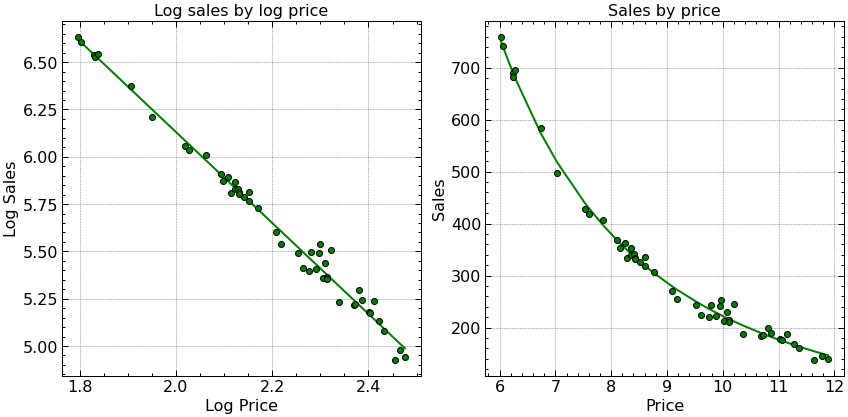

In [14]:
fig, axes= plt.subplots(1, 2, figsize=(12,6))

axes[0].plot(log_model["Log_Price"],log_sales_hat,'g-')
axes[0].plot(log_model["Log_Price"],log_model["Log_Sales"],'ko',markerfacecolor='g')
axes[0].set_xlabel('Log Price')
axes[0].set_ylabel('Log Sales')
axes[0].set_title('Log sales by log price')

axes[1].plot(log_model['Price'], np.exp(log_sales_hat),'g-')
axes[1].plot(log_model['Price'], log_model["Sales"],'ko',markerfacecolor='g')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Sales')
axes[1].set_title('Sales by price')
                        
plt.tight_layout()
plt.show()

# 3.  Multiple Linear Regression Model of Fuel Economy

### 3.1  Generating simulated data

In [30]:
np.random.RandomState(22)
weight=np.random.uniform(70, 220, 50)
horsepower=np.random.uniform(1600, 4500, 50)
fuel_econ= 11.68 + 0.0089*weight + 0.0884*horsepower + 10*np.random.randn(50)

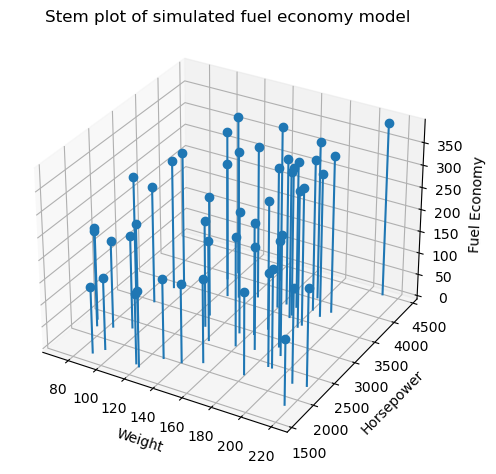

In [31]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

ax.stem(weight, horsepower, fuel_econ, basefmt=" ")
ax.set_xlabel('Weight')
ax.set_ylabel('Horsepower')
ax.set_zlabel('Fuel Economy')
ax.set_title('Stem plot of simulated fuel economy model', pad=0.01)

plt.tight_layout()
plt.show()

### 3.2 Multiple linear regression model

$$
y=\beta_0+\beta_1x_1+\cdots+\beta_ix_i\\
$$

In [17]:
mulreg=pd.DataFrame({'Weight':weight,
                     'Horsepower':horsepower,
                    'Fuel_Economy':fuel_econ})
mulreg=mulreg.sort_values(by=['Weight', 'Horsepower']).reset_index(drop=True)
mulreg.head(5)

,Weight,Horsepower,Fuel_Economy
0,72.560439,3922.708647,329.961672
1,87.036046,3303.718965,301.327537
2,93.134064,2393.511361,224.384483
3,93.833190,4400.791395,412.410806
4,96.807892,2867.915526,278.066112


In [18]:
x = mulreg[mulreg.columns[:-1]]
y = mulreg[mulreg.columns[-1]]
x = sm.add_constant(x)

model = sm.OLS(y, x).fit() 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Fuel_Economy   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     1218.
Date:                Sun, 18 Dec 2022   Prob (F-statistic):           3.27e-41
Time:                        19:45:45   Log-Likelihood:                -186.23
No. Observations:                  50   AIC:                             378.5
Df Residuals:                      47   BIC:                             384.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.6432      8.583      1.473      0.147      -4.623      29.910
Weight         0.0174      0.038      0.462      0.646      -0.058       0.093
Horsepower     0.0875      0.002     48.696      0.000       0.084       0.091
==============================================================================
Omnibus:                        1.973   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.373   Jarque-Bera (JB):                1.363
Skew:                          -0.398   Prob(JB):                        0.506
Kurtosis:                       3.139   Cond. No.                     1.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
fuel_econ_hat=model.params.Weight*mulreg["Weight"] +model.params.Horsepower*mulreg["Horsepower"] + model.params.const

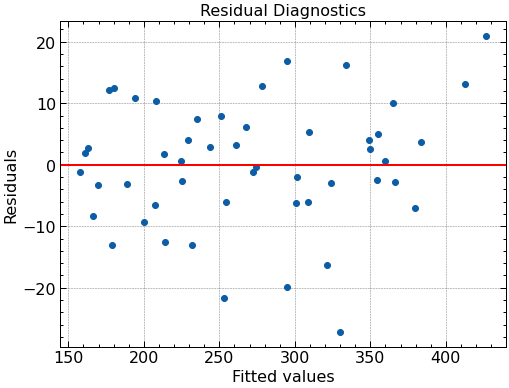

In [20]:
plt.scatter(mulreg['Fuel_Economy'], mulreg['Fuel_Economy'] - fuel_econ_hat)
plt.axhline(0, color='red')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Diagnostics')
plt.show()

# 4.  Logistic Regression Fit of Website Compromise Study

### 4.1  Generating simulated data

In [21]:
prob_model=pd.DataFrame({'Plugins':list(range(0,11)),
                      'Compromised':[16, 23, 20, 26, 40,55, 60, 74, 80, 83, 88],
                        'Not_compromised':[84, 77, 80, 74, 60, 45, 40, 26, 20, 17, 12]})
prob_model['Proportion_compromised']=np.round(prob_model['Compromised']/(prob_model['Compromised']+prob_model['Not_compromised']),2)

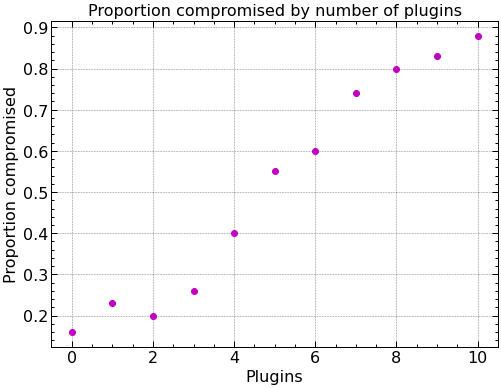

In [22]:
plt.scatter(prob_model['Plugins'], prob_model['Proportion_compromised'], color='m')
plt.xlabel('Plugins')
plt.ylabel('Proportion compromised')
plt.title('Proportion compromised by number of plugins')
plt.show()

### 4.2  Logit Regression Fit

$$
\ln\left(\frac p{1-p}\right)=\beta_0+\beta_1x_1+\cdots+\beta_ix_i
$$

$$
\Rightarrow p=\frac{e^{\beta_0+\beta_1x_1+\cdots+\beta_ix_i}}{1+e^{\beta_0+\beta_1x_1+\cdots+\beta_ix_i}}
$$

In [23]:
x = prob_model['Plugins']
x = sm.add_constant(x)
y = np.log(prob_model['Proportion_compromised']/(1-prob_model['Proportion_compromised']))
model = sm.OLS(y, x).fit() 
model.summary()

C:\Users\Kevin\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Proportion_compromised   R-squared:                       0.976
Model:                                OLS   Adj. R-squared:                  0.973
Method:                     Least Squares   F-statistic:                     363.5
Date:                    Sun, 18 Dec 2022   Prob (F-statistic):           1.38e-08
Time:                            19:45:49   Log-Likelihood:                 2.4679
No. Observations:                      11   AIC:                           -0.9358
Df Residuals:                           9   BIC:                           -0.1400
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8599      0.121    -15.426      0.000      -2.133      -1.587
Plugins        0.3886      0.020     19.066      0.000       0.342       0.435
==============================================================================
Omnibus:                        0.873   Durbin-Watson:                   1.395
Prob(Omnibus):                  0.646   Jarque-Bera (JB):                0.754
Skew:                          -0.451   Prob(JB):                        0.686
Kurtosis:                       2.089   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
x=np.arange(-15, 20, 0.1)
z=model.params.Plugins*x + model.params.const
propcom_hat=np.exp(z)/(1 + np.exp(z))

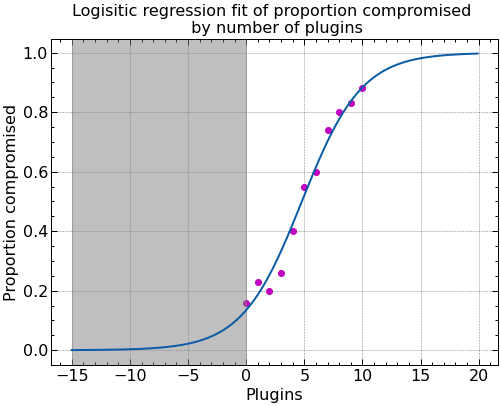

In [25]:
plt.plot(x, propcom_hat)
plt.scatter(prob_model['Plugins'], prob_model['Proportion_compromised'], color='m')
plt.axvspan(-15, 0, alpha=0.5, color='gray')
plt.xlabel('Plugins')
plt.ylabel('Proportion compromised')
plt.title('Logisitic regression fit of proportion compromised \n by number of plugins')
plt.show()